In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Telco_Customer_Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')  #read csv file and convert it to pana dataframe

In [9]:
df.drop(columns=['customerID'], inplace=True)   # droped the unecessary ID column

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # convert the taotal charges colum to float64 from object

In [13]:
#It create a new column based on tenure
#It allows for effective segmentation of customers based on their loyalty
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-4 years
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1-2 years
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,5+ years
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year


In [16]:
df['ChargesPerMonth'] = df['TotalCharges'] / df['tenure']

In [18]:
df['Contract_PaymentInteraction'] = df['Contract'] + '_' + df['PaymentMethod']

In [21]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,29.850000,Month-to-month_Electronic check,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,2-4 years,55.573529,One year_Mailed check,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,54.075000,Month-to-month_Mailed check,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,40.905556,One year_Bank transfer (automatic),0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,75.825000,Month-to-month_Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,1-2 years,82.937500,One year_Mailed check,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,102.262500,One year_Credit card (automatic),1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year,31.495455,Month-to-month_Electronic check,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year,76.650000,Month-to-month_Mailed check,1


In [20]:
df['HasPhoneAndInternet'] = np.where((df['PhoneService'] == 'Yes') & (df['InternetService'] != 'No'), 1, 0)

In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,29.850000,Month-to-month_Electronic check,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,2-4 years,55.573529,One year_Mailed check,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,54.075000,Month-to-month_Mailed check,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,40.905556,One year_Bank transfer (automatic),0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,75.825000,Month-to-month_Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,No,1-2 years,82.937500,One year_Mailed check,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,102.262500,One year_Credit card (automatic),1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-1 year,31.495455,Month-to-month_Electronic check,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-1 year,76.650000,Month-to-month_Mailed check,1


In [24]:
df['NumServices'] = ((df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies']] == 'Yes') |
                          (df['InternetService'].isin(['DSL', 'Fiber optic']))).sum(axis=1)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargesPerMonth,Contract_PaymentInteraction,HasPhoneAndInternet,NumServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0-1 year,29.850000,Month-to-month_Electronic check,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,2-4 years,55.573529,One year_Mailed check,1,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-1 year,54.075000,Month-to-month_Mailed check,1,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,40.905556,One year_Bank transfer (automatic),0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0-1 year,75.825000,Month-to-month_Electronic check,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1-2 years,82.937500,One year_Mailed check,1,7
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,5+ years,102.262500,One year_Credit card (automatic),1,6
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0-1 year,31.495455,Month-to-month_Electronic check,0,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Yes,Mailed check,74.40,306.60,Yes,0-1 year,76.650000,Month-to-month_Mailed check,1,2


In [83]:
import plotly.graph_objects as go

global_mean = np.round(df['Churn'].mean(), 2)

exclude_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

render_limit = 16  # Limit the number of figures because it crashes in colab and kaggle
counter = 0

for feature in df.columns:
    if feature in exclude_columns or feature == 'Churn':
        continue

    df_group = df.groupby(by=feature)['Churn'].mean().reset_index()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_group[feature],
        y=df_group['Churn'],
        marker=dict(
            color=df_group['Churn'],
            colorscale='Blues',  # Changed colorscale to 'Blues'
            colorbar=dict(title='Churn Rate', title_font=dict(color='black')),  # Adjusting color for colorbar title
        ),
        text=df_group['Churn'].round(2),
        textposition='auto',
    ))

    fig.add_shape(
        type='line',
        x0=df_group[feature].min(), x1=df_group[feature].max(),
        y0=global_mean, y1=global_mean,
        line=dict(color='orange', width=3, dash='dot')  # Changed line color to 'orange'
    )

    fig.add_annotation(
        x=df_group[feature].min() + (df_group[feature].max() - df_group[feature].min()) * 0.05,
        y=global_mean + 0.05,
        text=f'Global Mean: {global_mean}',
        showarrow=True,
        arrowhead=2,
        font=dict(color='black', size=14, family='Arial'),  # Changed font color to 'black'
        bgcolor='rgba(255, 255, 255, 0.7)'  # Keeping the background color for annotation
    )

    fig.update_layout(
        title=f'Churn Rate by {feature}',
        xaxis_title=feature,
        yaxis_title='Churn Rate',
        xaxis=dict(tickvals=df_group[feature], ticktext=df_group[feature].astype(int)),
        template='plotly_white',  # Changed template to 'plotly_white' for a brighter background
        title_font=dict(size=20, family='Arial', color='black'),  # Changed title font color to 'black'
        xaxis_title_font=dict(size=14, family='Arial', color='black'),  # Changed x-axis title color to 'black'
        yaxis_title_font=dict(size=14, family='Arial', color='black')   # Changed y-axis title color to 'black'
    )

    if counter < render_limit:
        fig.show()
        counter += 1
    else:
        break

In [27]:
list_of_non_numerical = df.select_dtypes(exclude=['int64', 'float64']).columns # Catch categecores coulumns
print("Non-numerical columns in training set:", list(list_of_non_numerical))

Non-numerical columns in training set: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'TenureGroup', 'Contract_PaymentInteraction']


In [29]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score  # For model evaluation
import joblib  # For saving and loading the model

In [62]:
label_encoder = LabelEncoder()
for col in list_of_non_numerical:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [63]:
X = df.drop('Churn', axis=1)  # Create the feature matrix X by dropping the target column 'Churn' from the DataFrame
y = df['Churn']               # Create the target vector y by selecting the 'Churn' column from the DataFrame

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# performed the standardization the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X = scaler.fit_transform(X)

In [69]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_forest = best_model.predict(X_test)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [70]:

print(best_params)
print(best_model)
print(accuracy_score(y_test, y_pred_forest))

{'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=150)
0.8608144192256342


In [71]:
# Define your model with best parameters (custom values can also be used)
forest_model = RandomForestClassifier(class_weight='balanced', bootstrap=False,
                                       max_depth=26, min_samples_leaf=1,
                                       min_samples_split=3, n_estimators=250)

# Fit the model with the training data
forest_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=26,
                       min_samples_split=3, n_estimators=250)

In [72]:
# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test)
y_prob_forest = forest_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC Curve
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)  # Area Under the ROC Curve

# Print evaluation metrics
print("Random Forest MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))  # Print accuracy
print("ROC-AUC:", roc_auc_score(y_test, y_prob_forest))  # Print ROC-AUC score


Random Forest MODEL
Accuracy: 0.8661548731642189
ROC-AUC: 0.9354909171393395


In [73]:
# Function to save the trained model
def save_model(model, filename):
    """Save the trained model to a file."""
    joblib.dump(model, filename)  # Save the model
    print(f"Model saved as {filename}")  # Confirmation message

In [74]:
# Save the trained model
save_model(forest_model, 'random_forest_model.joblib')  # Save the model with the specified filename

Model saved as random_forest_model.joblib


Test the model on test set

In [75]:
loaded_model = joblib.load('random_forest_model.joblib')

In [76]:
# Make predictions on the test data
y_pred = loaded_model.predict(X_test)

# If you want probabilities instead of class predictions
y_prob = loaded_model.predict_proba(X_test)[:, 1]


# Evaluate the model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)


Predictions: [1 1 0 ... 1 0 0]
Accuracy on test data: 0.8661548731642189


ROC-AUC on test data: 0.9354909171393395


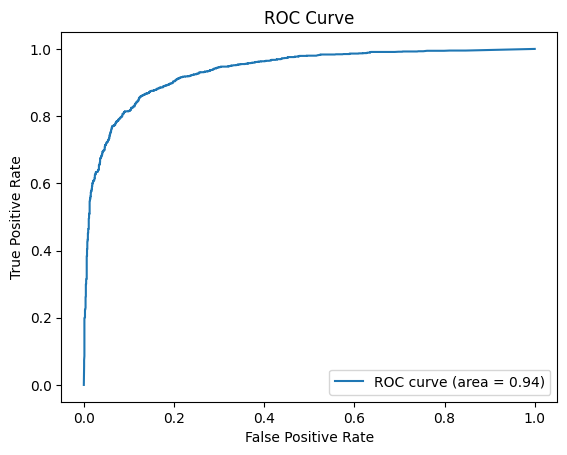

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate using ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC on test data:", roc_auc)

# Plot ROC Curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [79]:
import numpy as np
import pandas as pd
import joblib  # Assuming you are loading a saved model

# Example input data after manual encoding
input_data = {
    'gender': [1],
    'SeniorCitizen': [0],
    'Partner': [0],
    'Dependents': [0],
    'tenure': [2],
    'PhoneService': [1],
    'MultipleLines': [0],
    'InternetService': [0],
    'OnlineSecurity': [2],
    'OnlineBackup': [2],
    'DeviceProtection': [0],
    'TechSupport': [0],
    'StreamingTV': [0],
    'StreamingMovies': [0],
    'Contract': [0],
    'PaperlessBilling': [1],
    'PaymentMethod': [3],
    'MonthlyCharges': [53.85],
    'TotalCharges': [108.15],
    'TenureGroup': [0],
    'ChargesPerMonth': [54.075],
    'Contract_PaymentInteraction': [3],
    'HasPhoneAndInternet': [1],
    'NumServices': [3]
}
# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Load the pre-trained model
model = joblib.load('random_forest_model.joblib')  # Update with the correct model file path

# Make predictions
prediction = model.predict(input_df)
prediction_prob = model.predict_proba(input_df)[:, 1]  # Probability of churn

# Output the prediction
print("Churn Prediction:", prediction[0])
print("Churn Probability:", prediction_prob[0])


Churn Prediction: 1
Churn Probability: 0.5525815684029766


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
